In [1]:
# !pip install mtcnn

In [3]:
import urllib.request
from matplotlib.patches import Rectangle
def store_image(url, local_file_name):
  with urllib.request.urlopen(url) as resource:
    with open(local_file_name, 'wb') as f:
      f.write(resource.read())



In [4]:
# store_image('https://usefpakistan.org/Alumni/Public/alumniconference/profilepics/Muhammad_Ali_Shaikh.jpg',
#             'iacocca_1.jpg')
# store_image('https://www.smiu.edu.pk/themes/smiu/images/VC_image.jpg',
#             'iacocca_2.jpg')

# store_image('https://ichef.bbci.co.uk/news/320/cpsprodpb/5944/production/_107725822_55fd57ad-c509-4335-a7d2-bcc86e32be72.jpg',
#             'iacocca_1.jpg')
# store_image('https://www.gannett-cdn.com/presto/2019/07/03/PDTN/205798e7-9555-4245-99e1-fd300c50ce85-AP_080910055617.jpg?width=540&height=&fit=bounds&auto=webp',
#             'iacocca_2.jpg')

store_image('https://usefpakistan.org/Alumni/Public/alumniconference/profilepics/Muhammad_Ali_Shaikh.jpg',
            'iacocca_1.jpg')
store_image('https://www.smiu.edu.pk/themes/smiu/images/VC_image.jpg',
            'iacocca_2.jpg')

In [6]:
!pip install MTCNN

from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN


     |████████████████████████████████| 2.3MB 3.5MB/s 


Using TensorFlow backend.


In [7]:
image = plt.imread('iacocca_1.jpg')

In [8]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [90, 63, 114, 153], 'confidence': 0.9998205304145813, 'keypoints': {'left_eye': (122, 126), 'right_eye': (175, 125), 'nose': (151, 151), 'mouth_left': (128, 180), 'mouth_right': (172, 180)}}


In [9]:
{'box': [160, 40, 35, 44], 'confidence': 0.9999798536300659, 'keypoints': {'left_eye': (172, 57), 'right_eye': (188, 57), 'nose': (182, 64), 'mouth_left': (173, 73), 'mouth_right': (187, 73)}}

{'box': [160, 40, 35, 44],
 'confidence': 0.9999798536300659,
 'keypoints': {'left_eye': (172, 57),
  'mouth_left': (173, 73),
  'mouth_right': (187, 73),
  'nose': (182, 64),
  'right_eye': (188, 57)}}

In [10]:
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()


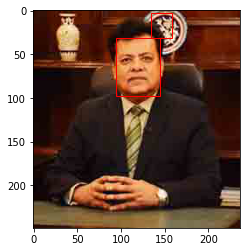

In [11]:
image = plt.imread('iacocca_2.jpg')
faces = detector.detect_faces(image)

highlight_faces('iacocca_2.jpg', faces)

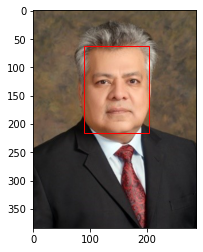

In [12]:
image = plt.imread('iacocca_1.jpg')
faces = detector.detect_faces(image)

highlight_faces('iacocca_1.jpg', faces)

In [13]:
str(faces)
type(faces[0])

dict

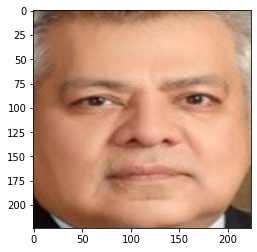

In [14]:
from numpy import asarray
from PIL import Image

def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

extracted_face = extract_face_from_image('iacocca_1.jpg')

# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()




In [15]:
!pip install keras_vggface
!pip install scipy

from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [16]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg')

    # perform prediction
    return model.predict(samples)
faces = [extract_face_from_image(image_path) for image_path in ['iacocca_1.jpg', 'iacocca_2.jpg']]

model_scores1 = get_model_scores(faces[0])
model_scores2 = get_model_scores(faces[1])
model_scores=[model_scores1,model_scores2]


94699520/94694792 [==============================] - 1s 0us/step


In [16]:
cosine(model_scores)

if cosine(model_scores1,model_scores2)<= 0.4:
   print("Faces Matched")
else:
  print("Not matched")

94699520/94694792 [==============================] - 1s 0us/step
